In [1]:
import numpy as np
import tensorflow as tf
from unet import unet
import matplotlib.pylab as plt
import glob
import os
from utils import dice_coef_loss, dice_coef
import nibabel as nib
from utils import min_max_normalization, dice_coefficient

In [2]:
data_path = "C:\\Users\\rober\\OneDrive\\Documents\\Datasets\\CC359\\Original\\"
masks_path = "C:\\Users\\rober\\OneDrive\\Documents\\Datasets\\CC359\\STAPLE\\"

source_domain_test = np.loadtxt("C:/Users/rober/OneDrive/Documents/GitHub/ENSF619.2/SLURM/Unet-Segmentation/Data-split/source_domain_test_set.txt",dtype = str)
target_domain_test = np.loadtxt("C:/Users/rober/OneDrive/Documents/GitHub/ENSF619.2/SLURM/Unet-Segmentation/Data-split/target_domain_test_set.txt",dtype = str)

source_test_images = [os.path.join(data_path,f + ".gz") for f in source_domain_test]
source_test_masks = [os.path.join(masks_path,f.split(".nii")[0] + "_staple.nii.gz") for f in source_domain_test]


target_test_images = [os.path.join(data_path,f + ".gz") for f in source_domain_test]
target_test_masks  = [os.path.join(masks_path,f.split(".nii")[0] + "_staple.nii.gz") for f in source_domain_test]
print(source_test_images[0])

C:\Users\rober\OneDrive\Documents\Datasets\CC359\Original\CC0001_philips_15_55_M.nii.gz


In [3]:
model_name = "unet_ss.h5"
model = unet(input_shape=(None, None, 1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss= dice_coef_loss,
              metrics=[dice_coef])

model.load_weights(model_name)

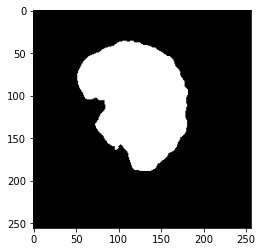

0.9843816410988159


In [4]:
for ii in range(len(source_test_images)):
    data = nib.load(source_test_images[ii]).get_fdata()
    data = min_max_normalization(data)
    mask = nib.load(source_test_masks[ii]).get_fdata() > 0.5
    H,W,Z = data.shape
    if W%16!=0:
        Wpad = 16*(W//16 +1)
    else:
        Wpad = W
    if Z%16!=0:
        Zpad = 16*(Z//16 +1)
    else:
        Zpad = Z
    data_pad = np.zeros((H,Wpad,Zpad,1))
    data_pad[:,:W,:Z,0] = data
    pred = model.predict(data_pad)[:,:W,:Z,0] > 0.5
    plt.figure()
    plt.imshow(data[50],cmap = "gray")
    plt.imshow(pred[50],cmap = "gray")
    plt.show()
    print(dice_coefficient(mask,pred))
    break